In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import speckle_stuffs as spkstf
import pickle
import scipy
import os
import pandas as pd
import seaborn as sns
sns.set()

In [4]:
# take 1 px binning for display purposes
picklesource = '/home/moro/localdata/39519608500622/data_25012019_002_39519608500622_762875588588056.pickle' # fig 2

filehandler = open(picklesource, 'rb')
[extr_traces, extr_footprints, dpars] = pickle.load(filehandler)
filehandler.close()
videofile = '/home/moro/localdata/'+picklesource.split('/')[-1].split('_')[1] + os.sep+ '_'.join((picklesource.split('/')[-1]).split('_')[:3])+'.mat'
video_source = np.swapaxes(scipy.io.loadmat(videofile)['video_data'], 0, 2)
gtfile = '/home/moro/localdata/'+picklesource.split('/')[-1].split('_')[1] + os.sep+ '_'.join((picklesource.split('/')[-1]).split('_')[:3])+'_gt.mat'
grtrh_traces = scipy.io.loadmat(gtfile)['pat']
grtrh_footprints = video_source[:dpars['components']]
grtrh_footprintsf =  spkstf.gauss_don_filt_GPU(grtrh_footprints, lp=dpars['lowfilter'], hp=dpars['highfilter'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


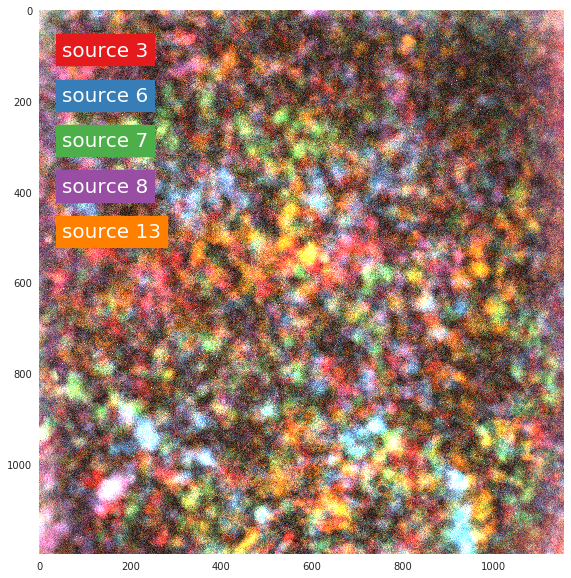

In [166]:
indes = [3, 6, 7, 8, 13]
# from color brewer
colors = [  
            [228,26,28],
            [55,126,184],
            [77,175,74],
            [152,78,163],
            [255,127,0]
         ]

colors = np.divide(colors,255.)

imagec = np.zeros((3,)+np.shape(grtrh_footprintsf[0]))

for idx, ind in enumerate(indes):
    imagec += [grtrh_footprintsf[ind]*cb for cb in colors[idx]]

imagec = np.swapaxes(imagec,0,2)/255.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.grid(False)
ax.imshow(imagec)

shift = 0
for idx, ind in enumerate(indes):
    ax.text(50, 100+idx*100, 'source '+str(ind), color='white', backgroundcolor=colors[idx], fontsize=20)

fig.show()

In [6]:
picklesource = '/home/moro/localdata/154588749961840/data_23032019_all_154588749961840_1215868743061893.pickle' # fig 3
filehandler = open(picklesource, 'rb')
[extr_traces, extr_footprints, dpars] = pickle.load(filehandler)
filehandler.close()
videofile = '/home/moro/localdata/'+picklesource.split('/')[-1].split('_')[1] + os.sep+ '_'.join((picklesource.split('/')[-1]).split('_')[:3])+'.mat'
video_source = np.swapaxes(scipy.io.loadmat(videofile)['video_data'], 0, 2)
gtfile = '/home/moro/localdata/'+picklesource.split('/')[-1].split('_')[1] + os.sep+ '_'.join((picklesource.split('/')[-1]).split('_')[:3])+'_gt.mat'
grtrh_traces = scipy.io.loadmat(gtfile)['pat']
grtrh_footprints = video_source[:dpars['components']]
grtrh_footprintsf =  spkstf.gauss_don_filt_GPU(grtrh_footprints, lp=dpars['lowfilter'], hp=dpars['highfilter'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


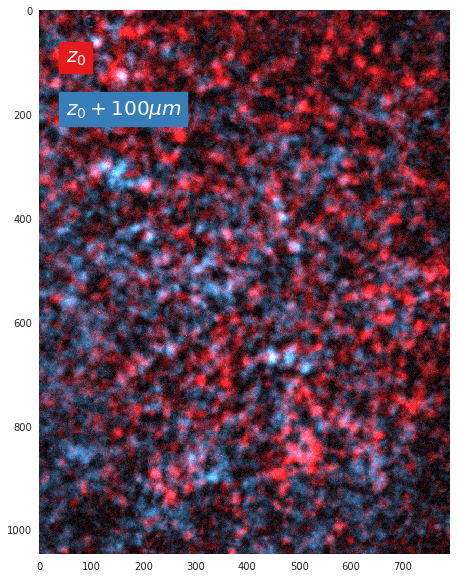

In [168]:
indes = [3, 11]
# from color brewer
colors = [  
            [228,26,28],
            [55,126,184],
            [77,175,74],
            [152,78,163],
            [255,127,0]
         ]

colors = np.divide(colors,255.)

imagec = np.zeros((3,)+np.shape(grtrh_footprintsf[0]))

for idx, ind in enumerate(indes):
    imagec += [grtrh_footprintsf[ind]*cb for cb in colors[idx]]

imagec = np.swapaxes(imagec,0,2)/255.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.grid(False)
ax.imshow(imagec)

shift = 0
strs = [r'$z_0$', r'$z_0 + 100 \mu m$' ]
for idx, ind in enumerate(indes):
    ax.text(50, 100+idx*100, strs[idx], color='white', backgroundcolor=colors[idx], fontsize=20)

fig.show()